In [105]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [106]:
# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [107]:
from src import soporte_ajuste as sa

In [108]:
df = pd.read_csv("datos/datos_preprocesados.csv",index_col=0)

In [109]:
df.head()

,price,size,municipality,distance,hasVideo,status,hasPlan,has3DTour,floor,hasLift,...,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,showAddress_False,showAddress_True,has360_False,has360_True,has360_desconocido
0,750.0,0.12,0.445948,-0.252799,0.0,0.0,0.0,0.0,0.069359,1.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
1,750.0,0.52,0.038221,0.182949,1.0,0.0,1.0,0.0,-0.756628,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,715.0,0.00,0.038221,-0.020333,0.0,0.0,0.0,0.0,0.069359,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,590.0,0.52,-2.098184,2.118218,0.0,0.0,0.0,0.0,-1.114680,0.0,...,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,715.0,0.00,0.038221,-0.020333,0.0,0.0,0.0,0.0,0.069359,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# Separamos la variable respuesta del resto de variables
X = df.drop(columns="price")
y = df[["price"]]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, random_state=42)
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

LinearRegression()

In [112]:
y_train_pred = modelo_lineal.predict(X_train)
y_train_pred[:3]

array([[692.81121787],
       [696.93184163],
       [726.91376667]])

In [113]:
y_test_pred = modelo_lineal.predict(X_test)
y_test_pred[:3]

array([[700.16110068],
       [722.47807682],
       [691.76123329]])

In [114]:
metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
}

In [115]:
pd.DataFrame(metricas).T

,r2_score,MAE,MSE,RMSE
train,0.479682,27.584189,1508.181920,38.835318
test,0.503698,29.208633,1405.571946,37.490958


El modelo no es bueno, especialmente porque el r^2 bajo indica que las variables no está muy bien elegidas de cara a predecir el precio. Habría que dar una vuelta al preprocesamiento para tratar de mejorar esto. El RMSE también habría que innentar bajarlo.

Si bajamos el train_size de 0,85 se empieza a producir overfiiting.

Comparamos los precios predichos con los precios de los datos originales.

In [116]:
y_train.reset_index(inplace= True)
df_predicted = pd.DataFrame(y_train_pred)
df_predicted.rename(columns = {0:"predicted"}, inplace=True)
df_precios = pd.concat([df_predicted, y_train], axis=1)
df_precios.drop(columns = "index", inplace= True)
df_precios.head(5)

,predicted,price
0,692.811218,666.0
1,696.931842,750.0
2,726.913767,725.0
3,619.357736,590.0
4,685.081225,700.0


Sacamos una visualización mediante un scatterplot

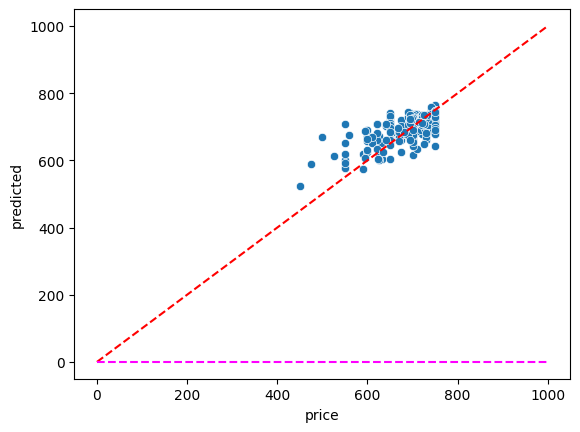

In [117]:
sns.scatterplot(df_precios, x="price", y="predicted")
plt.plot([0,1000], [0,1000], color="red", ls = '--')
plt.plot([0,1000], [0,0], color="magenta", ls = '--')